# T-Tests and Chi-Square Tests

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg

## One-Sample T-Test

### Manual One-Tailed

In [2]:
N = 20
popMu = .5
data  = np.random.randn(N) + popMu

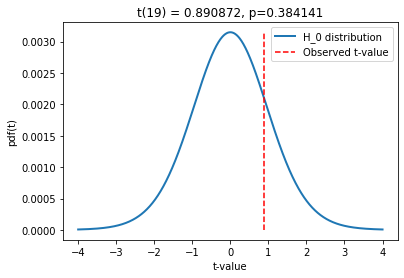

In [3]:
H0val = 0

# calculate t-stat
t_num = np.mean(data) - H0val
t_den = np.std(data, ddof=1) / np.sqrt(N)
tval = t_num / t_den

df = N-1

# p-value
pval = (1-stats.t.cdf(abs(tval),df)) * 2

# H0 parameter distribution and observed t-value
x = np.linspace(-4,4,1001)
tdist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,tdist,linewidth=2)
plt.plot([tval,tval],[0,max(tdist)],'r--')
plt.legend(('H_0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g'%(df,tval,pval))
plt.show()

### Convert to Two-Tailed

In [4]:
pval = (1-stats.t.cdf(abs(tval),df)) * 2
print(f"t(N-1) = {tval}, p = {pval}")

t(N-1) = 0.8908718928890903, p = 0.3841405938820426


### Scipy Implementation

In [5]:
## this is a two-tailed one-sample test

t,p = stats.ttest_1samp(data,H0val)
print(tval,p)

0.8908718928890903 0.3841405938820427


## Independent Samples T-Tests

In [6]:
from numpy.random import randn
from scipy.stats import ttest_ind

data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51

tval, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (tval, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-1.820, p=0.070
Same distributions (fail to reject H0)


In [10]:
# generate data
data1 = np.random.randn(N) + 2 # mean 2, variance 1
data2 = np.random.randn(N) # mean 0, variance 1

# roll your own t-test:
var_data1 = data1.var(ddof=1)
var_data2 = data2.var(ddof=1)
s = np.sqrt( (var_data1 + var_data2) / 2 ) # balanced standard deviation
t = (data1.mean() - data2.mean()) / (s * np.sqrt(2.0/N))
df = 2*N - 2
p = 1 - stats.t.cdf(np.abs(t), df=df) # one-sided test p-value
print("t:\t", t, "p:\t", 2*p) # two-sided test p-value

# built-in t-test:
t2, p2 = stats.ttest_ind(data1, data2)
print("t2:\t", t2, "p2:\t", p2)

t:	 7.5288682762447765 p:	 4.788886842632678e-09
t2:	 7.5288682762447765 p2:	 4.788886919378158e-09


## Paired T-Test

In [12]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_rel

data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51

stat, p = ttest_rel(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=-0.717, p=0.475
Same distributions (fail to reject H0)


## Chi-Squared Contingency

In [13]:
from scipy.stats import chi2, chi2_contingency

def get_p_value(T):
    # same as scipy.stats.chi2_contingency(T, correction=False)
    det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    p = 1 - chi2.cdf(x=c2, df=1)
    return p

# get data
df = pd.read_csv('advertisement_clicks.csv')
a = df[df['advertisement_id'] == 'A']
b = df[df['advertisement_id'] == 'B']
a = a['action']
b = b['action']

A_clk = a.sum()
A_noclk = a.size - a.sum()
B_clk = b.sum()
B_noclk = b.size - b.sum()

T = np.array([[A_clk, A_noclk], [B_clk, B_noclk]])

print(get_p_value(T))

0.0013069502732125926
